In [12]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA


In [6]:
df = pd.read_csv('/Users/davidsousa/Statistical_Methods_Data_Mining/1_eda/my_dataset.csv')

In [7]:
X = df.drop("Y", axis=1)
y = df["Y"]

In [13]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for plotting
X_pca = pca.fit_transform(X)

# Clustering 

### Hierarchical Clustering

In [ ]:
# Hierarchical clustering and dendrogram plotting
linkage_methods = ['single', 'complete', 'average', 'ward', 'centroid']
for method in linkage_methods:
    linked = linkage(X, method=method)

    plt.figure(figsize=(10, 7))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f'Dendrogram - {method.title()} Linkage')
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()

### K-Means

/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


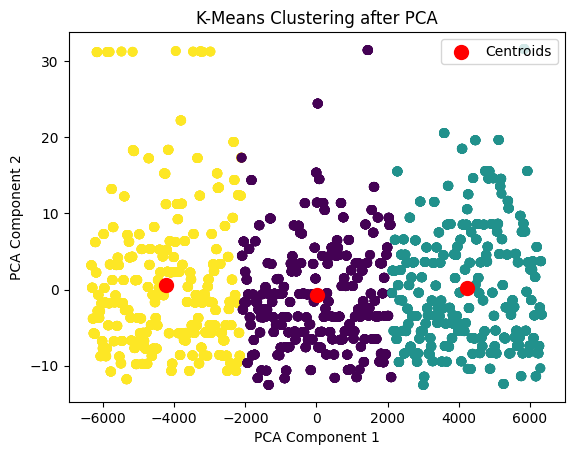

In [15]:
# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X)
centroids = pca.transform(kmeans.cluster_centers_)  # Transform centroids

# Plotting
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, label='Centroids')
plt.title("K-Means Clustering after PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

### K-medoids

/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


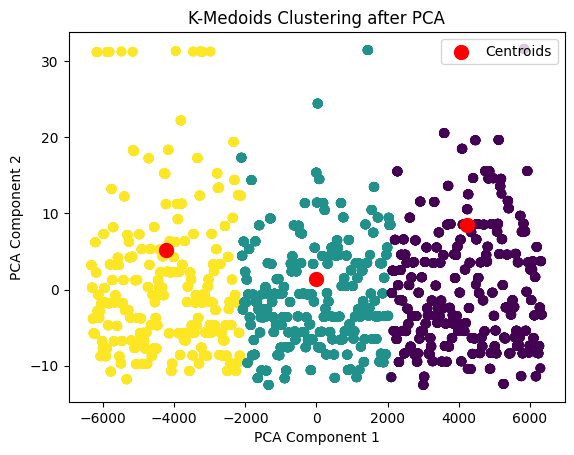

In [16]:
# K-Medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=0)
clusters = kmedoids.fit_predict(X)
centroids = pca.transform(kmedoids.cluster_centers_)  # Transform centroids

# Plotting
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, label='Centroids')
plt.title("K-Medoids Clustering after PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

### DBSCAN

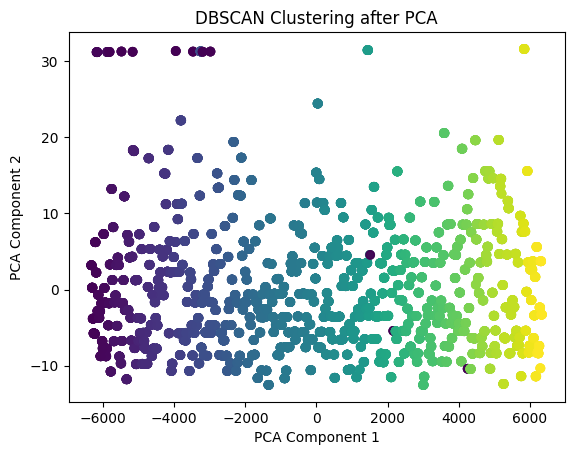

In [22]:
# DBSCAN clustering
dbscan = DBSCAN(eps=10, min_samples=10)
clusters = dbscan.fit_predict(X)

# Plotting
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("DBSCAN Clustering after PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

### Spectral clustering

In [23]:
# Spectral Clustering
spectral = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=0)
clusters = spectral.fit_predict(X)

# Plotting
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("Spectral Clustering after PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

/Users/davidsousa/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


KeyboardInterrupt: 